In [ ]:
!pip install plotly

In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import zscore


# This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

# Loading the data
We can now load the dataset into pandas using the `read_csv()` or `read_xlxs()`  function. This converts the CSV and Xlxs files into a Pandas dataframe.

In [2]:
#Read the excel files and convert to a Pandas dataframe
shanghai_ranking = pd.read_excel("shanghai Ranking.xlsx")
times_ranking = pd.read_excel("Times Higher Education.xlsx")
world_ranking = pd.read_excel("Word Rank University.xlsx")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Display the first 3 rows of `shanghai_ranking` dataset
shanghai_ranking.head(3)

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...


In [4]:
# Display the first 3 rows of `times_ranking` dataset
times_ranking.head(3)

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Display the first 3 rows of `world_ranking` dataset
world_ranking.head(3)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2



We decided to change the given datasets and collect the most current data (for the year 2024) and use it for our analysis instead, for these two reasons:

1- The problem statment question does not specified certian time period or if they need it over the years.

2- The available datasets are not in the same period one dataset in 2022 and two datasets in 2023 and they have large number of null values.

# New Dataset


1 - [Shanghai Ranking](https://www.kaggle.com/datasets/computingvictor/2024-academic-ranking-of-world-universities)

2 - [Times Ranking](https://www.kaggle.com/datasets/ddosad/timesworlduniversityrankings2024)

3 - [CWUR Ranking](https://www.kaggle.com/datasets/armanghazi/top-1000-univercity-ranking-2014-2024-cwur)

In [6]:
#Read the CSV files and convert to a Pandas dataframe
shanghai_ranking2024 = pd.read_csv("shanghai_ranking_2024.csv")
times_ranking2024 =  pd.read_csv("TIMES_WorldUniversityRankings_2024.csv")
Word_Rank_University_2014_2024 =  pd.read_csv("univercity_ranking_2014_2024_CWUR.csv")

# Viewing the dataframe
We can get a quick sense of our dataset by using 2 methods like: `,head()`, `.shape`.

In [7]:
# Display the first 3 rows of `shanghai_ranking2024` dataset
shanghai_ranking2024.head(3)

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,55.2,70.8,59.1,73.6


In [8]:
# Display the first 3 rows of `times_ranking2024` dataset
times_ranking2024.head(3)

,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,disabled,website_url
0,1,University of Oxford,98.5,10,96.6,5,100.0,2,99.0,5,...,"21,750",10.9,42%,49 : 51,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,False,https://www.timeshighereducation.com/student/r...
1,2,Stanford University,98.0,20,99.0,1,97.8,8,99.6,2,...,"14,517",6.4,23%,47 : 53,Stanford University,"Computer Science,Communication & Media Studies...",False,False,False,NaN
2,3,Massachusetts Institute of Technology,97.9,30,98.6,2,96.2,11,99.7,1,...,"11,085",8.0,33%,41 : 59,Massachusetts Institute of Technology,"Architecture,Economics & Econometrics,Archaeol...",False,False,False,https://www.timeshighereducation.com/student/r...


In [9]:
# Display the first 3 rows of `Word_Rank_University_2014_2024` dataset
Word_Rank_University_2014_2024.head(3)

,World Rank,Institution,Location,Year,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,2014,1.0,1.0,1.0,1.0,1.0,100.00
1,2,Stanford University,USA,2014,2.0,11.0,2.0,4.0,4.0,99.09
2,3,Massachusetts Institute of Technology,USA,2014,3.0,3.0,11.0,2.0,6.0,98.69


In [10]:
print("Number of Rows and Columns in:")
print("Shanghai Ranking 2024 Dataset:", shanghai_ranking2024.shape)
print("Times Ranking 2024 Dataset:", times_ranking2024.shape)
print("World Ranking 2024 Dataset:", Word_Rank_University_2014_2024.shape)

Number of Rows and Columns in:
Shanghai Ranking 2024 Dataset: (1000, 9)
Times Ranking 2024 Dataset: (2673, 29)
World Ranking 2024 Dataset: (11000, 10)


World Ranking 2024 Dataset is from 2014 to 2024. So, we need to extract only records relataed to 2024.

# 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

## Step1: Descriptive Analysis:

###  For Academic Ranking of World Universities (ARWU), `shanghai_ranking2024` Dataset:

In [11]:
# Display the first 3 rows
shanghai_ranking2024.head(3)

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,55.2,70.8,59.1,73.6


In [12]:
# Print the column labels
shanghai_ranking2024.columns

Index(['Rank', 'University_Name', 'National/Regional Rank', 'Alumni', 'Award',
       'Hici', 'N&S', 'PUB', 'PCP'],
      dtype='object')

**There are 9 Columns in shanghai_ranking2024 Datasets:**

- `Rank` : The global rank of the university

- `University_Name` : The name of the university or higher education institution being ranked

- `National/Regional Rank` : The rank of the university within its respective country or region

- `Alumni` : The score related to the number of alumni who have won Nobel Prizes or Fields Medals

- `Award` : The score reflecting the number of staff at the university who have won Nobel Prizes in specified fields or Fields Medals.

- `Hici` : The score based on the number of Highly Cited Researchers affiliated with the university

- `N&S` : The score representing the number of research articles published in Nature and Science between 2019 and 2023.

- `PUB` : The score indicating the number of papers published by the university in the Science Citation Index-

- `PCP` : The Per Capita Performance score, calculated by dividing the weighted scores of the five indicators

> We need column for the country of the university to answer the question 3

Methodology for Ranking 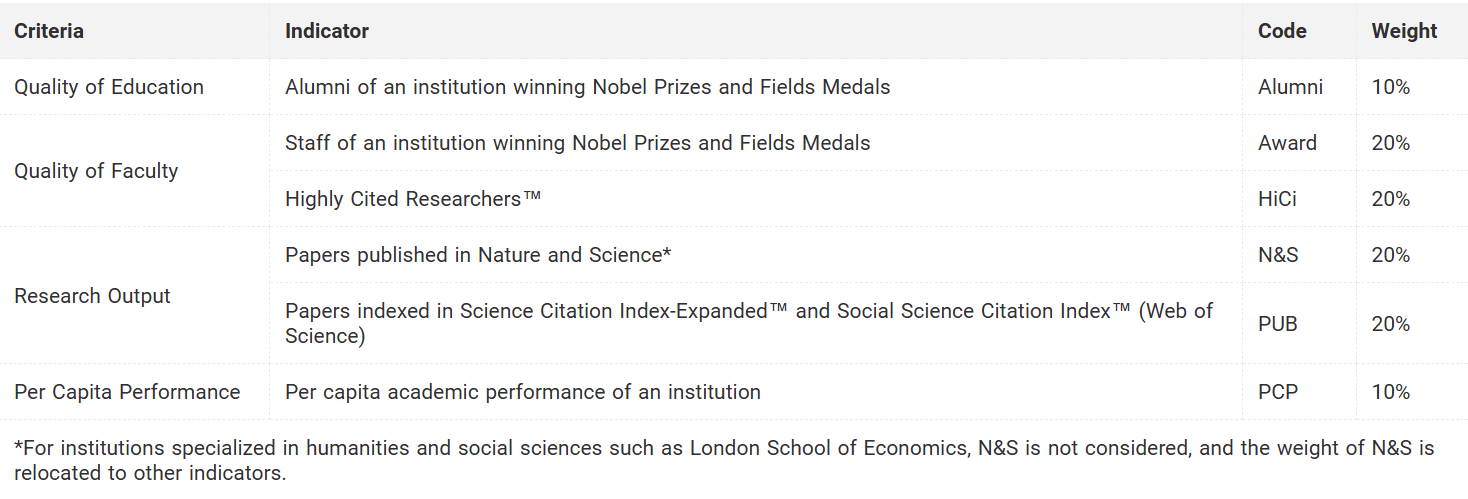

In [13]:
# Print the information about the dataframe
shanghai_ranking2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    1000 non-null   object 
 1   University_Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Alumni                  1000 non-null   float64
 4   Award                   1000 non-null   float64
 5   Hici                    1000 non-null   float64
 6   N&S                     989 non-null    float64
 7   PUB                     1000 non-null   float64
 8   PCP                     1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


> There are 11 missing values in `N&S` column.

In [14]:
# Print summary statistics for categorical features
shanghai_ranking2024.describe(include='object')

,Rank,University_Name,National/Regional Rank
count,1000,1000,1000
unique,87,1000,130
top,901-1000,Harvard University,1
freq,100,1,60


In [15]:
# Print summary statistics for numerical features
shanghai_ranking2024.describe(include='number')

,Alumni,Award,Hici,N&S,PUB,PCP
count,1000.000000,1000.00000,1000.000000,989.000000,1000.000000,1000.000000
mean,4.509600,3.78120,10.734400,10.575126,35.113000,19.655300
std,10.103201,11.45538,10.949265,10.637247,13.684495,8.800436
min,0.000000,0.00000,0.000000,0.000000,9.300000,8.600000
25%,0.000000,0.00000,0.000000,3.900000,25.775000,14.100000
50%,0.000000,0.00000,9.200000,7.300000,31.700000,17.600000
75%,0.000000,0.00000,14.600000,13.300000,41.425000,23.000000
max,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000


###  For Times World University Rankings, ` times_ranking2024`:

In [ ]:
# Display the first 3 rows
times_ranking2024.head(3)

In [ ]:
# Print the column labels
times_ranking2024.columns



* `rank:` The global ranking of the university in short form.
* `name:` The name of the university.
* `scores_overall_rank:` The ranking of the university based on its overall score.
* `scores_teaching_rank:` The ranking based on teaching quality.
* `scores_research_rank:` The ranking based on research performance.
* `scores_citations_rank:` The ranking based on research impact (citations).
* `scores_industry_income_rank:` The ranking based on industry collaboration and funding.
* `scores_international_outlook_rank:` The ranking based on international engagement (faculty, students, and collaborations).
* `scores_overall:` The overall score of the university (usually a weighted combination of other scores).
* `scores_teaching:` A score evaluating the quality of teaching.
* `scores_research:` A score evaluating research output and reputation.
* `scores_citations:` A score measuring how frequently the university's research is cited.
* `scores_industry_income:` A score reflecting the university’s ability to attract industry funding.
* `scores_international_outlook:` A score evaluating global engagement (international faculty, students, and collaborations).
* `record_type:` The type of record (e.g., whether the university is included in the ranking or another category).
* `member_level:` Indicates if the university is a member of THE’s partnership programs.
* `url:` The university’s profile page on THE website.
* `nid:` A unique identifier for the university.
* `location:` The country (and sometimes city) where the university is based.
* `stats_number_students:` The total number of students at the university.
* `stats_student_staff_ratio:` The ratio of students to academic staff.
* `stats_pc_intl_students:` The percentage of international students.
* `stats_female_male_ratio:` The gender ratio of students.
* `aliases:` Alternative names or abbreviations of the university.
* `subjects_offered:` The academic disciplines the university offers.
* `closed:` A boolean (True/False) indicating whether the university is closed.
* `unaccredited:` A boolean (True/False) indicating whether the university lacks accreditation.
* `disabled:` A boolean (True/False) indicating if the university is inactive in the rankings.
* `website_url:` The official website of the university.











> We need to drop unuseful columns that are not related to our questions and keep the most realted.


In [ ]:
# Print the information about the dataframe
times_ranking2024.info()

** Missing Values Datatypes..

In [ ]:
# Print summary statistics for categorical features
times_ranking2024.describe(include='object')

In [ ]:
# Print summary statistics for numerical features
times_ranking2024.describe(include='number')

###  For World University Rankings, ` world_ranking2024`:

In [68]:
# Display the first 3 rows
Word_Rank_University_2014_2024.head(3)

,World Rank,Institution,Location,Year,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,2014,1.0,1.0,1.0,1.0,1.0,100.00
1,2,Stanford University,USA,2014,2.0,11.0,2.0,4.0,4.0,99.09
2,3,Massachusetts Institute of Technology,USA,2014,3.0,3.0,11.0,2.0,6.0,98.69


In [69]:
# Print the column labels
Word_Rank_University_2014_2024.columns

Index(['World Rank', 'Institution', 'Location', 'Year', 'National Rank',
       'Education Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank',
       'Score'],
      dtype='object')

- `World Rank` : the global ranking of a university based on The Center for World University Rankings methodology.
Institution: lists the names of universities or educational institutions being ranked.
- `Location` :specifies the country or city where the university is located.
- `Year`:the year of the ranking.
- `National Rank`:the ranking of the university within its own country.
- `Education Rank` :Reflects the ranking of the university specifically in terms of educational quality and outcomes.
- `Employability Rank`:the university's ranking based on the employability of its graduates.
- `Faculty Rank` :Description: Ranks universities based on the quality and quantity of their faculty.
- `Research Rank` :Reflects the university's ranking in terms of research output and quality. It considers publications, citations, and contributions to academic knowledge.
- `Score` : A numerical score that summarizes the university's overall performance based on various factors used in the ranking methodology.

 The Center for World University Rankings methodology


1) Education: based on the academic success of a university’s alumni, measured relative to the university's size (25%)
2) Employability: based on the professional success of a university’s alumni, measured relative to the university's size (25%)
3) Faculty: measured by the number of faculty members who have received top academic distinctions (10%)
4) Research:
>  * Research Output: measured by the total number of research articles (10%)
>  * High-Quality Publications: measured by the number of research articles appearing in top-tier journals (10%)
>  * Influence: measured by the number of research articles appearing in highly-influential journals (10%)
>  * Citations: measured by the number of highly-cited research articles (10%)

> The dataset cointain the ranks from 2014 to 2024 and we need to extract the current data related to our problem which is 2024 and then drop the `Year` column after that.


In [70]:
# Extract the ranks for only the year 2024
Word_Rank_University_2024 =Word_Rank_University_2014_2024[Word_Rank_University_2014_2024['Year'] ==2024]

In [71]:
# Print the information about the dataframe
Word_Rank_University_2014_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          11000 non-null  int64  
 1   Institution         11000 non-null  object 
 2   Location            11000 non-null  object 
 3   Year                11000 non-null  int64  
 4   National Rank       11000 non-null  float64
 5   Education Rank      11000 non-null  float64
 6   Employability Rank  11000 non-null  float64
 7   Faculty Rank        11000 non-null  float64
 8   Research Rank       11000 non-null  float64
 9   Score               11000 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 859.5+ KB


There are no missing values and all the data type are correct.

In [72]:
# Print summary statistics for categorical features
Word_Rank_University_2014_2024.describe(include='object')

,Institution,Location
count,11000,11000
unique,1415,70
top,Harvard University,USA
freq,11,2414


In [73]:
# Print summary statistics for numerical features
Word_Rank_University_2014_2024.describe(include='number')

,World Rank,Year,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,500.500000,2019.000000,42.564000,396.651091,605.275182,225.877545,492.518455,64.914389
std,288.688113,3.162421,52.211741,169.086874,337.317192,72.163672,275.554950,14.867908
min,1.000000,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42.490000
25%,250.750000,2016.000000,6.000000,321.000000,331.000000,210.000000,253.000000,45.670000
50%,500.500000,2019.000000,22.000000,383.000000,582.000000,240.000000,505.500000,71.700000
75%,750.250000,2022.000000,54.000000,527.000000,1001.000000,275.000000,723.000000,75.500000
max,1000.000000,2024.000000,229.000000,667.000000,1001.000000,304.000000,1001.000000,100.000000


## Step2: Data Quality Checks:**

### 1. Reliability

The data source is trustworthy; it comes from the Center for World University Rankings website.

### 2. Timeliness

The data provided is current and accurately represents the situation

### 3. Consistency


As we have different ranking **methodology** for each data sets so, the logical meaning of the column accept different values for the same data items.

### 4. Relevance



>1. `Sample Appropriateness`:  the data sample aligns with  analysis objectives.
>
> 2. `Variable Selection`:
- **In Shanghai Ranking:** All the columns are important and related to our question. Just we need to add further column for universities countries.
- **In Times Ranking:** 'Reporter' refers to universities that have not submitted their data to Times Higher Education and, therefore, are not assigned a rank in its classification. In our case, we do not need all the columns to answer the questions, so all the unrelevance columns will be deleted.
- **In World University Rankings:** All the columns are related to our questions but the year column we are no longer need it after filtered the data.

In [ ]:
times_ranking2024[times_ranking2024["rank"]=="Reporter"]

In [ ]:
times_ranking2024[times_ranking2024["rank"]=="Reporter"].shape

In [ ]:
times_ranking2024.info()

All of these columns are unrelevance  and will be deleted in the cleaning phase
* scores_overall_rank
* scores_teaching_rank
* scores_research_rank
* scores_citations_rank
* scores_industry_income_rank
* scores_international_outlook_rank
* record_type
* member_level
* url
* nid
* stats_number_students
* disabled
* website_url closed
* subjects_offered aliases
* stats_female_male_ratio
* stats_pc_intl_students
* stats_student_staff_ratio


### 5. Uniqueness

####  For Academic Ranking of World Universities (ARWU), `shanghai_ranking2024` Dataset:

**1- Duplicated Ranks**

**2- Duplicated Universities After Adding the `Country` Column**

In [150]:
# 1- The ranks in thier webiste shows that from 1 to 100 after that it become as a range
# So, we would like to print the duplicated values from 1 to 100 first
duplicated_values = shanghai_ranking2024["Rank"][0:100].value_counts()[lambda x: x > 1]
duplicated_values

,count
Rank,
90.0,4
82.0,3
47.0,3
55.0,3
69.0,3
43.0,2
45.0,2
58.0,2
33.0,2


In [151]:
# Now, we would like to print the duplicated values from the ranges above 100
duplicated_values = shanghai_ranking2024["Rank"][100: -1].value_counts()
duplicated_values

,count
Rank,
201.0,100
301.0,100
401.0,100
501.0,100
601.0,100
701.0,100
801.0,100
901.0,99
101.0,50


In [152]:
# e.g for duplicated ranks
duplicates = shanghai_ranking2024[0:100].groupby('Rank').filter(lambda x: len(x) > 1)
duplicates.head(6)

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP,Country
7,8.0,california institute of technology,6-7,55.7,63.4,29.8,57.9,41.0,100.0,US
8,8.0,columbia university,6-7,59.4,63.2,42.7,51.9,67.0,31.6,US
11,12.0,paris-saclay university,1,36.9,73.8,33.8,33.9,65.7,47.1,FR
12,12.0,cornell university,10,42.2,44.2,41.7,55.8,63.9,45.0,US
17,18.0,university of washington,14-15,22.6,33.2,43.7,52.3,71.4,25.9,US
18,18.0,"university of california, san diego",14-15,18.0,32.4,54.5,51.7,60.8,32.7,US


After searching, we found that in the Shanghai Academic Ranking of World Universities (ARWU), two or more universities are allowed to share the same rank if they have the same scores according to the evaluation criteria. This system is based on rankings related to academic and research performance rather than assigning a single winner to each rank. So, we will keep this duplicates because it have logical meaning.

####  For Times World University Rankings, ` times_ranking2024`:

In [153]:
times_ranking2024.head(3)

,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,unaccredited
0,1,University of Oxford,98.5,96.6,100.0,99.0,98.7,97.5,United Kingdom,False
1,2,Stanford University,98.0,99.0,97.8,99.6,100.0,87.0,United States,False
2,3,Massachusetts Institute of Technology,97.9,98.6,96.2,99.7,100.0,93.8,United States,False


In [154]:
times_ranking2024.duplicated(['name']).sum()

0

####  For World University Rankings, ` world_ranking2024`:

In [155]:
Word_Rank_University_2024.head()

,World Rank,University_Name,Country,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
10000,1,Harvard University,United States,1.0,1.0,1.0,1.0,1.0,100.0
10001,2,Massachusetts Institute of Technology,United States,2.0,4.0,12.0,2.0,12.0,96.8
10002,3,Stanford University,United States,3.0,10.0,4.0,3.0,2.0,95.2
10003,4,University of Cambridge,United Kingdom,1.0,3.0,26.0,4.0,14.0,94.1
10004,5,University of Oxford,United Kingdom,2.0,7.0,28.0,9.0,6.0,93.3


In [156]:
Word_Rank_University_2024.duplicated().sum()

0

In [157]:
# Check for duplicates in World Rank
Word_Rank_University_2024['World Rank'].duplicated().sum()

0

In [158]:
# Check for duplicates in National Rank
Word_Rank_University_2024['National Rank'].duplicated().sum()

791

In [159]:
Word_Rank_University_2024['Employability Rank'].duplicated().sum()

510

In [160]:
Word_Rank_University_2024[Word_Rank_University_2024['Employability Rank'].duplicated()]

,World Rank,University_Name,Country,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
10036,37,"University of California, San Francisco",United States,23.0,551.0,1001.0,15.0,26.0,85.9
10039,40,Karolinska Institute,Sweden,1.0,42.0,1001.0,35.0,56.0,85.6
10049,50,University of Chinese Academy of Sciences,China,3.0,551.0,1001.0,284.0,5.0,84.7
10056,57,Humboldt University of Berlin,Germany,2.0,71.0,1001.0,50.0,72.0,84.2
10057,58,Free University of Berlin,Germany,3.0,75.0,1001.0,42.0,73.0,84.1
...,...,...,...,...,...,...,...,...,...
10994,995,Northeast Forestry University,China,161.0,551.0,1001.0,284.0,947.0,70.5
10995,996,Institut national de la recherche scientifique,Canada,27.0,551.0,1001.0,284.0,949.0,70.5
10997,998,Federal University of Bahia,Brazil,21.0,551.0,1001.0,284.0,951.0,70.5
10998,999,Medical University of Lodz,Poland,11.0,551.0,1001.0,284.0,950.0,70.5


In [162]:
#count the unique location
Word_Rank_University_2024['Country'].nunique()

63

In [164]:
# Check for duplicates in National Rank per Location
duplicates = Word_Rank_University_2024.groupby(['Country', 'National Rank']).size().reset_index(name='Count')
# Filter for only those with duplicates
duplicated_counts = duplicates[duplicates['Count'] > 1].sum()
duplicated_counts

,0
Country,0
National Rank,0.0
Count,0


### 6. Completeness

####  For Academic Ranking of World Universities (ARWU), `shanghai_ranking2024` Dataset:

In [165]:
shanghai_ranking2024.isnull().sum()

,0
Rank,0
University_Name,0
National/Regional Rank,0
Alumni,0
Award,0
Hici,0
N&S,0
PUB,0
PCP,0
Country,0


In [166]:
shanghai_ranking2024[shanghai_ranking2024["N&S"].isnull()]

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP,Country


Missing values from the website itself and we will fill it using forward and backward filling approach.

####  For Times World University Rankings, ` times_ranking2024`:

In [167]:
times_ranking2024.head(3)

,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,unaccredited
0,1,University of Oxford,98.5,96.6,100.0,99.0,98.7,97.5,United Kingdom,False
1,2,Stanford University,98.0,99.0,97.8,99.6,100.0,87.0,United States,False
2,3,Massachusetts Institute of Technology,97.9,98.6,96.2,99.7,100.0,93.8,United States,False


In [168]:
times_ranking2024.isnull().sum().sort_values(ascending = False)

,0
rank,0
name,0
scores_overall,0
scores_teaching,0
scores_research,0
scores_citations,0
scores_industry_income,0
scores_international_outlook,0
location,0
unaccredited,0


####  For World University Rankings, ` world_ranking2024`:

In [169]:
Word_Rank_University_2024.isnull().sum()

,0
World Rank,0
University_Name,0
Country,0
National Rank,0
Education Rank,0
Employability Rank,0
Faculty Rank,0
Research Rank,0
Score,0


In [170]:
Word_Rank_University_2024

,World Rank,University_Name,Country,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
10000,1,Harvard University,United States,1.0,1.0,1.0,1.0,1.0,100.0
10001,2,Massachusetts Institute of Technology,United States,2.0,4.0,12.0,2.0,12.0,96.8
10002,3,Stanford University,United States,3.0,10.0,4.0,3.0,2.0,95.2
10003,4,University of Cambridge,United Kingdom,1.0,3.0,26.0,4.0,14.0,94.1
10004,5,University of Oxford,United Kingdom,2.0,7.0,28.0,9.0,6.0,93.3
...,...,...,...,...,...,...,...,...,...
10995,996,Institut national de la recherche scientifique,Canada,27.0,551.0,1001.0,284.0,949.0,70.5
10996,997,North Dakota State University,United States,209.0,273.0,923.0,284.0,968.0,70.5
10997,998,Federal University of Bahia,Brazil,21.0,551.0,1001.0,284.0,951.0,70.5
10998,999,Medical University of Lodz,Poland,11.0,551.0,1001.0,284.0,950.0,70.5


### 7. Accuracy:

####  For Academic Ranking of World Universities (ARWU), `shanghai_ranking2024` Dataset:

In [171]:

rank100 = shanghai_ranking2024['Country'][:100]
country_counts = rank100.value_counts().reset_index()
country_counts.columns = ['Country', 'Frequency']

purple_gradient = [
    "#E1BBE7", "#CDA7DA", "#B993CD", "#A57FC0",
    "#8F6BB3", "#7858A6", "#5B4B8A", "#4C3575", "#371B58"
]

fig = px.bar(country_counts,
             x='Country',
             y='Frequency',
             title="High Ranked Countries",
             labels={"Frequency": "Number of Universities", "Country": "Country"},
             color='Frequency',
             color_continuous_scale=purple_gradient)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [172]:
arabic_country = [
    "DZ",  # Algeria
    "BH",  # Bahrain
    "KM",  # Comoros
    "DJ",  # Djibouti
    "EG",  # Egypt
    "IQ",  # Iraq
    "JO",  # Jordan
    "KW",  # Kuwait
    "LB",  # Lebanon
    "LY",  # Libya
    "MR",  # Mauritania
    "MA",  # Morocco
    "OM",  # Oman
    "PS",  # Palestine
    "QA",  # Qatar
    "SA",  # Saudi Arabia
    "SO",  # Somalia
    "SD",  # Sudan
    "SY",  # Syria
    "TN",  # Tunisia
    "AE",  # UAE (United Arab Emirates)
    "YE"   # Yemen
]

first300_countries = shanghai_ranking2024['Country'][:300]
arab_in300 = first300_countries[first300_countries.isin(arabic_country)]
counts = arab_in300.value_counts()
plot_data = pd.DataFrame({'Country': counts.index, 'Frequency': counts.values})

fig = px.bar(plot_data,
             x='Country',
             y='Frequency',
             title="Number of Universities per Country (Top 300)",
             labels={"Frequency": "Number of Universities"},  # Improved label
             color='Frequency',  # Use 'Frequency' for color scaling
             color_continuous_scale=px.colors.sequential.Plasma)  # Choose a suitable color scale

# Customize the layout
fig.update_layout(
    xaxis_title="Country",  # Explicitly set x-axis title
    yaxis_title="Number of Universities", # Explicitly set y-axis title
    xaxis_tickangle=-45,
    title_font=dict(size=20),  # Adjust title font size
    font=dict(
        family="Courier New, monospace", # Example font
        size=12,
        color="RebeccaPurple"
    ))
fig.show()
# create a histogram that showes number of arabic universties for each country
#I try first 100 rank , but only SA and UAE that has a rank



In [173]:
# it shows the rank of arabic unversities for each arabic country

arabic_countries = shanghai_ranking2024[shanghai_ranking2024['Country'].isin(arabic_country)]

fig = px.strip(arabic_countries, x="Country", y="Rank",
                 title="rank of arabic country unversities",hover_data='University_Name',
                 category_orders={"Country": arabic_countries['Country'].unique()})

fig.update_layout(
    xaxis_title="Country",
    yaxis_title="University Rank",
    xaxis_tickangle=-45,

)

fig.show()


In [174]:

purple_gradient = [
    "#371B58", "#4C3575", "#5B4B8A", "#7858A6",
    "#8F6BB3", "#A57FC0", "#B993CD", "#CDA7DA", "#E1BBE7"
]

fig = px.scatter(
    arabic_countries,
    x="Country",
    y="Rank",
    title="University Rankings for Arabic Countries",
    labels={"Rank": "University Ranking", "Country": "Country"},
    color="Rank",
    color_continuous_scale=purple_gradient,
)



fig.show()


In [175]:
import plotly.express as px

count_data = arabic_countries.groupby(['Country', 'Rank']).size().reset_index(name='Count')

unique_ranks = sorted(count_data["Rank"].unique())
purple_gradient = [
    "#371B58", "#4C3575", "#5B4B8A", "#7858A6",
    "#8F6BB3", "#A57FC0", "#B993CD", "#CDA7DA", "#E1BBE7"
]

while len(purple_gradient) < len(unique_ranks):
    purple_gradient += purple_gradient

color_map = {rank: color for rank, color in zip(unique_ranks, purple_gradient)}

fig = px.bar(
    count_data,
    x="Country",
    y="Count",
    color="Rank",
    title="Distribution of University Ranks by Country",
    labels={"Count": "Number of Universities", "Country": "Country"},
    barmode="group",
    color_discrete_map=color_map
)

fig.update_layout(coloraxis_showscale=False)

fig.show()


# 2. Data Cleaning:




###  For Academic Ranking of World Universities (ARWU), `shanghai_ranking2024` Dataset:

Here we Cleaned 3 Issues:

>1- Adding `country` column.

>2- Drop duplicated universities occured after step 1.

>3- Filling missing values in `N&S` column using forward and backward filling.

**1- Add `Country` column**


The datasets for university's counteies:

1- https://www.kaggle.com/datasets/thedevastator/all-universities-in-the-world

2- https://www.kaggle.com/datasets/anshdwvdi/list-of-all-universities-in-the-world

We will merge it with our dataset by name of the university

In [18]:
# Read the CSV files
all_universities = pd.read_csv('world-universities.csv')
list_universities = pd.read_csv('list_of_univs.csv')

In [19]:
# Standardizing column names for merging
all_universities.rename(columns={'University of Andorra': 'University_Name', 'AD': 'Country'}, inplace=True)
list_universities.rename(columns={'name': 'University_Name', 'country': 'Country'}, inplace=True)

# Clean the university names to be in lowercase letters and remove spaces at the beginning and at the end of the names
shanghai_ranking2024['University_Name'] = shanghai_ranking2024['University_Name'].str.strip().str.lower()
all_universities['University_Name'] = all_universities['University_Name'].str.strip().str.lower()
list_universities['University_Name'] = list_universities['University_Name'].str.strip().str.lower()

In [20]:
# Combine the two dataset of university's countries
combined_universities = pd.concat([all_universities[['University_Name', 'Country']],
                                   list_universities[['University_Name', 'Country']].rename(columns={'Country_Name': 'Country'})])

# Remove duplicates
combined_universities.drop_duplicates(subset=['University_Name'], inplace=True)

In [21]:
# Merge the `shanghai_ranking2024` dataset with `combined_universities`
shanghai_ranking2024 = shanghai_ranking2024.merge(combined_universities, on='University_Name', how='left')

# Checking for universities with missing countries
missing_countries = shanghai_ranking2024[shanghai_ranking2024['Country'].isna()]
print(f"Number of universities with missing countries: {len(missing_countries)}")
print("Missing Universities Names:")
print(missing_countries['University_Name'].tolist())


Number of universities with missing countries: 431
Missing Universities Names:
['massachusetts institute of technology (mit)', 'paris-saclay university', 'university college london', 'eth zurich', 'the university of tokyo', 'university of michigan-ann arbor', 'university of copenhagen', 'psl university', 'the university of melbourne', 'shanghai jiao tong university', 'the university of edinburgh', 'sorbonne university', 'karolinska institute', 'university of munich', 'university of minnesota, twin cities', 'technical university of munich', 'heidelberg university', 'the university of manchester', "king's college london", 'the university of texas southwestern medical center at dallas', 'swiss federal institute of technology lausanne', 'université paris cité', 'university of bonn', 'the university of queensland', 'university of zurich', 'the university of hong kong', 'the university of new south wales', 'ku leuven', 'the hebrew university of jerusalem', 'the ohio state university - columb

In [22]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.2 MB/s eta 0:00:00


In [23]:
# Import the process module from RapidFuzz for fuzzy string matching
from rapidfuzz import process


def get_closest_match(name, choices):
    """
    Finds the closest matching string from a list of choices using fuzzy matching.

    Parameters:
    name (str): The input string to be matched.
    choices (list): A list of possible matches.

    Returns:
    str or None: The best matching string if the similarity score is above 80, otherwise None.
    """
    match = process.extractOne(name, choices) # Get the closest match and its similarity score
    return match[0] if match and match[1] > 80 else None # Return the match if score > 80, else return None

In [24]:
# Get university names from combined dataset
combined_universities_names = combined_universities['University_Name'].unique()

# Apply matching to get the closest match
shanghai_ranking2024['Country'] = shanghai_ranking2024['University_Name'].apply(
    lambda x: get_closest_match(x, combined_universities_names))

# Use the merged dataset to get countries
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].map(
    combined_universities.set_index('University_Name')['Country'])

# Print the result
shanghai_ranking2024.head()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP,Country
0,1,harvard university,1,100.0,97.1,100.0,100.0,100.0,85.7,US
1,2,stanford university,2,45.3,88.1,73.1,83.9,73.1,59.6,US
2,3,massachusetts institute of technology (mit),3,71.9,82.8,55.2,70.8,59.1,73.6,US
3,4,university of cambridge,1,78.2,90.8,45.1,59.8,67.2,60.6,GB
4,5,"university of california, berkeley",4,65.3,76.5,46.9,62.8,57.1,55.5,US


In [25]:
# Checking for universities with missing countries
missing_countries = shanghai_ranking2024[shanghai_ranking2024['Country'].isna()]
print(f"Number of universities with missing countries: {len(missing_countries)}")
print("Missing Universities Names:")
print(missing_countries['University_Name'].tolist())

Number of universities with missing countries: 0
Missing Universities Names:
[]


In [26]:
# Print number of rows and columns after merging
shanghai_ranking2024.shape

(1000, 10)

In [27]:
# Print the inforamtion of the dataset after merging and check the `Country` column
shanghai_ranking2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    1000 non-null   object 
 1   University_Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Alumni                  1000 non-null   float64
 4   Award                   1000 non-null   float64
 5   Hici                    1000 non-null   float64
 6   N&S                     989 non-null    float64
 7   PUB                     1000 non-null   float64
 8   PCP                     1000 non-null   float64
 9   Country                 1000 non-null   object 
dtypes: float64(6), object(4)
memory usage: 78.3+ KB


In [28]:
# # Define a dictionary for country replacements
# country_replacements = {
#     'United States': 'US',
#     'France': 'FR',
#     'Switzerland': 'CH',
#     'China': 'CN',
#     'Hong Kong, China': 'HK',
#     'United Kingdom': 'GB',
#     'Netherlands': 'NL',
#     'Spain': 'ES',
#     'Korea, Republic of': 'KR',
#     'Sweden': 'SE',
#     'Belgium': 'BE',
#     'Finland': 'FI',
#     'Ghana': 'GH',
#     'Czech Republic': 'CZ',
#     'South Africa': 'ZA',
#     'Russian Federation': 'RU',
#     'Georgia': 'GE',
#     'Viet Nam': 'VN',
#     'Hungary': 'HU',
#     'Austria': 'AT',
#     'Turkey': 'TR',
#     'Poland': 'PL',
#     'Singapore': 'SG'
# }

# # Replace country names using the dictionary
# shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace(country_replacements)


In [29]:
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('United States', 'US')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('France', 'FR')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Switzerland', 'CH')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('China', 'CN')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Hong Kong, China', 'HK')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('United Kingdom', 'GB')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Netherlands', 'NL')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Spain', 'ES')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Korea, Republic of', 'KR')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Sweden', 'SE')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Belgium', 'BE')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Finland', 'FI')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Ghana', 'GH')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Czech Republic', 'CZ')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('South Africa', 'ZA')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Russian Federation', 'RU')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Georgia', 'GE')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Viet Nam', 'VN')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Hungary', 'HU')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Austria', 'AT')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Turkey', 'TR')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Poland', 'PL')
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country'].replace('Singapore', 'SG')


In [30]:
shanghai_ranking2024['Country']

,Country
0,US
1,US
2,US
3,GB
4,US
...,...
995,CL
996,PK
997,HK
998,JO


**Check that every university has the correct countray Manually**

In [31]:
US = shanghai_ranking2024[shanghai_ranking2024["Country"] == "US"]
print(US.shape[0])
US[21:41]

191


,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP,Country
34,35,university of north carolina at chapel hill,22,7.3,21.9,41.7,34.1,59.8,32.2,US
35,36,university of wisconsin - madison,23,28.0,31.3,27.6,31.7,59.9,24.0,US
38,39,duke university,24,19.4,17.8,33.2,37.7,60.1,22.1,US
44,45,the university of texas at austin,25,23.2,21.6,32.5,29.0,55.6,28.6,US
46,47,"university of minnesota, twin cities",26,26.0,15.0,36.2,26.9,60.5,22.7,US
53,54,the university of texas southwestern medical c...,27,17.2,31.4,31.2,34.4,39.9,27.4,US
55,55,university of illinois at urbana-champaign,28,25.4,33.0,17.2,29.9,51.9,26.1,US
58,58,"university of maryland, college park",29,17.2,18.4,29.8,35.6,48.5,31.5,US
61,62,university of southern california,30,0.0,29.1,31.2,23.6,53.3,25.0,US
63,64,"university of california, santa barbara",31,13.7,36.0,18.4,35.2,34.5,35.8,US


In [32]:
US.shape[0]

191

In [33]:
filtered_counts = shanghai_ranking2024["Country"].value_counts()[(shanghai_ranking2024["Country"].value_counts() > 1)
                  & (shanghai_ranking2024["Country"].value_counts() < 10)]
filtered_counts.head(3)

,count
Country,
EG,9
ZA,9
ES,9


In [74]:
countries_of_interest = ["GH", "MT", "JO", "CY", "MY", "LB", "SK", "RO", "SG", "LU", "Belgium", "KH", "Turkey", "AZ", "SI", "MO", "BG", "EE"]
filtered_data = shanghai_ranking2024[shanghai_ranking2024["Country"].isin(countries_of_interest)]
filtered_data.head()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP,Country
47,47,technical university of munich,2,34.0,17.2,22.5,26.9,55.3,47.9,GH
67,68,national university of singapore,1,0.0,0.0,40.7,24.9,63.1,33.5,SG
93,90,nanyang technological university,2,0.0,0.0,42.2,20.4,53.9,30.3,SG
361,301-400,lancaster university,26-31,0.0,0.0,13.0,12.9,31.3,20.4,GH
366,301-400,university of macau,1,0.0,0.0,17.2,2.5,39.6,28.9,MO


It is an iterative proccess and we found that there are 211 universities have wrong country. So, to correct that we decided to build a database for total universities we found it with thier correct country and merger it with original dataset (shanghai_ranking2024).

In [75]:
shanghai_ranking2024.head()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP,Country
0,1,harvard university,1,100.0,97.1,100.0,100.0,100.0,85.7,US
1,2,stanford university,2,45.3,88.1,73.1,83.9,73.1,59.6,US
2,3,massachusetts institute of technology (mit),3,71.9,82.8,55.2,70.8,59.1,73.6,US
3,4,university of cambridge,1,78.2,90.8,45.1,59.8,67.2,60.6,GB
4,5,"university of california, berkeley",4,65.3,76.5,46.9,62.8,57.1,55.5,US


In [76]:
# We build a database in pandas and saved it as a CSV file and read it here
Correct_Country = pd.read_csv("New_University_Name_and_Country.csv")
Correct_Country.head()

,University_Name,Country
0,Ghent University,BE
1,Aix Marseille University,FR
2,University of Montreal,CA
3,University of Mainz,DE
4,Toulouse Capitole University,FR


In [77]:
print(shanghai_ranking2024.columns)
print(Correct_Country.columns)

Index(['Rank', 'University_Name', 'National/Regional Rank', 'Alumni', 'Award',
       'Hici', 'N&S', 'PUB', 'PCP', 'Country'],
      dtype='object')
Index(['University_Name', 'Country'], dtype='object')


In [78]:
Correct_Country['University_Name'] = Correct_Country['University_Name'].str.strip().str.lower()
shanghai_ranking2024['University_Name'] = shanghai_ranking2024['University_Name'].str.strip().str.lower()

# Merge corrections with the original data
shanghai_ranking2024 = shanghai_ranking2024.merge(Correct_Country, on='University_Name', how='left')

# Replace incorrect countries with correct ones
shanghai_ranking2024['Country'] = shanghai_ranking2024['Country_y'].combine_first(shanghai_ranking2024['Country_x'])

# Drop the Correct_Country column as it is no longer needed
shanghai_ranking2024.drop(columns=['Country_x', 'Country_y'], inplace=True)


In [79]:
shanghai_ranking2024.to_csv("shanghai_ranking2024_with_countries.csv", index=False)

In [80]:
shanghai_ranking2024[shanghai_ranking2024["University_Name"] == "aix marseille university"]

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP,Country
149,101-150,aix marseille university,5-7,16.4,0.0,18.4,21.3,52.3,20.1,FR
150,101-150,aix marseille university,5-7,16.4,0.0,18.4,21.3,52.3,20.1,FR


In [81]:
shanghai_ranking2024["Country"].isnull().sum()

0

**2- Drop duplicated universities occured after step 1.**

In [82]:
shanghai_ranking2024["University_Name"].duplicated().sum()

30

In [83]:
shanghai_ranking2024.shape

(1030, 10)

In [84]:
duplicates = shanghai_ranking2024[:].groupby('University_Name').filter(lambda x: len(x) > 1)
duplicates

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP,Country
90,90,ghent university,2,0.0,9.2,32.5,17.80,55.5,33.3,BE
91,90,ghent university,2,0.0,9.2,32.5,17.80,55.5,33.3,BE
92,90,ghent university,2,0.0,9.2,32.5,17.80,55.5,33.3,BE
149,101-150,aix marseille university,5-7,16.4,0.0,18.4,21.30,52.3,20.1,FR
150,101-150,aix marseille university,5-7,16.4,0.0,18.4,21.30,52.3,20.1,FR
171,151-200,university of montreal,6-8,10.4,0.0,15.9,21.30,52.2,24.9,CA
172,151-200,university of montreal,6-8,10.4,0.0,15.9,21.30,52.2,24.9,CA
173,151-200,university of montreal,6-8,10.4,0.0,15.9,21.30,52.2,24.9,CA
174,151-200,university of mainz,6-11,0.0,6.5,17.2,20.30,36.4,35.4,DE
175,151-200,university of mainz,6-11,0.0,6.5,17.2,20.30,36.4,35.4,DE


In [85]:
print("Before:", shanghai_ranking2024.shape)
shanghai_ranking2024.drop_duplicates(keep='first', inplace=True)
print("After:", shanghai_ranking2024.shape)

Before: (1030, 10)
After: (1000, 10)


In [86]:
shanghai_ranking2024.head()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP,Country
0,1,harvard university,1,100.0,97.1,100.0,100.0,100.0,85.7,US
1,2,stanford university,2,45.3,88.1,73.1,83.9,73.1,59.6,US
2,3,massachusetts institute of technology (mit),3,71.9,82.8,55.2,70.8,59.1,73.6,US
3,4,university of cambridge,1,78.2,90.8,45.1,59.8,67.2,60.6,GB
4,5,"university of california, berkeley",4,65.3,76.5,46.9,62.8,57.1,55.5,US


In [87]:
shanghai_ranking2024.tail()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP,Country
1025,901-1000,universidad andrés bello,4,0.0,0.0,6.5,4.0,21.1,9.5,CL
1026,901-1000,university of lahore,3-5,0.0,0.0,0.0,1.4,27.5,11.7,PK
1027,901-1000,linnaeus university,13,0.0,0.0,6.5,3.5,19.0,13.3,SE
1028,901-1000,university of wuppertal,49-51,0.0,0.0,0.0,6.9,19.3,19.4,DE
1029,901-1000,abdul wali khan university mardan,3-5,0.0,0.0,6.5,3.8,20.9,9.4,PK


In [88]:
shanghai_ranking2024.describe(include = "object")

,Rank,University_Name,National/Regional Rank,Country
count,1000,1000,1000,1000
unique,87,1000,130,82
top,901-1000,harvard university,1,CN
freq,100,1,60,191


In [89]:
shanghai_ranking2024["Country"].isnull().sum()

0

**3- Filling missing values in `N&S` column -1.**

In [90]:
shanghai_ranking2024.loc[shanghai_ranking2024["University_Name"] == "london school of economics and political science", "N&S"] = -1.0

shanghai_ranking2024.loc[shanghai_ranking2024["University_Name"] == "toulouse capitole university", "N&S"] = -1.0

shanghai_ranking2024.loc[shanghai_ranking2024["University_Name"] == "renmin university of china", "N&S"] = -1.0

shanghai_ranking2024.loc[shanghai_ranking2024["University_Name"] == "university of international business and economics", "N&S"] = -1.0

shanghai_ranking2024.loc[shanghai_ranking2024["University_Name"] == "Southwestern University of Finance and Economics".lower(), "N&S"] = -1.0

shanghai_ranking2024.loc[shanghai_ranking2024["University_Name"] == "Zhongnan University of Economics and Law".lower(), "N&S"] = -1.0

shanghai_ranking2024.loc[shanghai_ranking2024["University_Name"] == "Shanghai University of Finance and Economics".lower(), "N&S"] = -1.0

shanghai_ranking2024.loc[shanghai_ranking2024["University_Name"] == "Tilburg University".lower(), "N&S"] = -1.0

shanghai_ranking2024.loc[shanghai_ranking2024["University_Name"] == "HSE University".lower(), "N&S"] = -1.0

shanghai_ranking2024.loc[shanghai_ranking2024["University_Name"] == "Copenhagen Business School".lower(), "N&S"] = -1.0

shanghai_ranking2024.loc[shanghai_ranking2024["University_Name"] == "Stockholm School of Economics".lower(), "N&S"] = -1.0


In [91]:
shanghai_ranking2024.isnull().sum()

,0
Rank,0
University_Name,0
National/Regional Rank,0
Alumni,0
Award,0
Hici,0
N&S,0
PUB,0
PCP,0
Country,0


###  For Times World University Rankings, ` times_ranking2024`:

**1- Drop all unrelevance columns**

In [177]:
times_ranking2024 = times_ranking2024.drop(['scores_overall_rank',
                         'scores_teaching_rank' ,
                         "scores_research_rank",
                         "scores_citations_rank",
                         "scores_industry_income_rank",
                         "scores_international_outlook_rank",
                         "record_type",
                         "member_level","url","nid",
                         "stats_number_students","disabled",
                         "website_url" , "closed", "subjects_offered" , "aliases",
                        "stats_female_male_ratio" ,"stats_pc_intl_students" ,
                        "stats_student_staff_ratio"], axis=1, errors="ignore")

In [178]:
times_ranking2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1904 entries, 0 to 1903
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   rank                          1904 non-null   object 
 1   name                          1904 non-null   object 
 2   scores_overall                1904 non-null   object 
 3   scores_teaching               1904 non-null   float64
 4   scores_research               1904 non-null   float64
 5   scores_citations              1904 non-null   float64
 6   scores_industry_income        1904 non-null   float64
 7   scores_international_outlook  1904 non-null   float64
 8   location                      1904 non-null   object 
 9   unaccredited                  1904 non-null   bool   
dtypes: bool(1), float64(5), object(4)
memory usage: 150.6+ KB


**2- Drop all rows that contains rank "Reporter"**

In [93]:
#Delete unrelevent rows
times_ranking2024 = times_ranking2024.loc[times_ranking2024['rank'] != 'Reporter']

In [94]:
times_ranking2024

,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,unaccredited
0,1,University of Oxford,98.5,96.6,100.0,99.0,98.7,97.5,United Kingdom,False
1,2,Stanford University,98.0,99.0,97.8,99.6,100.0,87.0,United States,False
2,3,Massachusetts Institute of Technology,97.9,98.6,96.2,99.7,100.0,93.8,United States,False
3,4,Harvard University,97.8,97.7,99.9,99.4,84.2,90.8,United States,False
4,5,University of Cambridge,97.5,95.8,100.0,98.0,87.9,97.4,United Kingdom,False
...,...,...,...,...,...,...,...,...,...,...
1899,1501+,Yanshan University,9.7–22.7,19.5,11.7,34.5,36.0,20.4,China,False
1900,1501+,Yeditepe University,9.7–22.7,22.0,12.4,17.6,59.3,38.8,Turkey,False
1901,1501+,Yerevan State University,9.7–22.7,23.9,8.6,26.8,16.4,38.1,Armenia,False
1902,1501+,Yogyakarta State University,9.7–22.7,16.9,10.5,28.8,23.1,30.6,Indonesia,False


###  For World University Rankings, ` world_ranking2024`:

In [95]:
# drop the year column
Word_Rank_University_2024 = Word_Rank_University_2024.copy()
Word_Rank_University_2024.drop('Year', axis=1, inplace=True)

In [96]:
Word_Rank_University_2024

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
10000,1,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,100.0
10001,2,Massachusetts Institute of Technology,USA,2.0,4.0,12.0,2.0,12.0,96.8
10002,3,Stanford University,USA,3.0,10.0,4.0,3.0,2.0,95.2
10003,4,University of Cambridge,United Kingdom,1.0,3.0,26.0,4.0,14.0,94.1
10004,5,University of Oxford,United Kingdom,2.0,7.0,28.0,9.0,6.0,93.3
...,...,...,...,...,...,...,...,...,...
10995,996,Institut national de la recherche scientifique,Canada,27.0,551.0,1001.0,284.0,949.0,70.5
10996,997,North Dakota State University,USA,209.0,273.0,923.0,284.0,968.0,70.5
10997,998,Federal University of Bahia,Brazil,21.0,551.0,1001.0,284.0,951.0,70.5
10998,999,Medical University of Lodz,Poland,11.0,551.0,1001.0,284.0,950.0,70.5


In [97]:
Word_Rank_University_2024.rename(columns={'Institution':'University_Name', 'Location':'Country' }, inplace = True)

In [98]:
country_replacements = {
    'USA': 'United States',
    'FR': 'France',
    'CH': 'Switzerland',
    'CN': 'China',
    'HK': 'Hong Kong, China',
    'GB': 'United Kingdom',
    'NL': 'Netherlands',
    'ES': 'Spain',
    'KR': 'Korea, Republic of',
    'SE': 'Sweden',
    'BE': 'Belgium',
    'FI': 'Finland',
    'GH': 'Ghana',
    'CZ': 'Czech Republic',
    'ZA': 'South Africa',
    'RU': 'Russian Federation',
    'GE': 'Georgia',
    'VN': 'Viet Nam',
    'HU': 'Hungary',
    'AT': 'Austria',
    'TR': 'Turkey',
    'PL': 'Poland',
    'SG': 'Singapore'
}

# Replace abbreviations with full names, but keep existing full names as they are
Word_Rank_University_2024['Country'] = Word_Rank_University_2024['Country'].replace(country_replacements)

In [99]:
Word_Rank_University_2024[['World Rank','University_Name','Country']].head(10)

,World Rank,University_Name,Country
10000,1,Harvard University,United States
10001,2,Massachusetts Institute of Technology,United States
10002,3,Stanford University,United States
10003,4,University of Cambridge,United Kingdom
10004,5,University of Oxford,United Kingdom
10005,6,Princeton University,United States
10006,7,Columbia University,United States
10007,8,University of Pennsylvania,United States
10008,9,Yale University,United States
10009,10,California Institute of Technology,United States


##### Which universities are ranked in the top 10 for employment outcomes?

In [100]:
Word_Rank_University_2024[['Employability Rank','University_Name']].sort_values(by='Employability Rank').head(10)

,Employability Rank,University_Name
10000,1.0,Harvard University
10121,2.0,INSEAD
10208,3.0,Institut national du service public
10002,4.0,Stanford University
10271,5.0,China Europe International Business School
10012,6.0,University of Tokyo
10272,7.0,HEC Paris
10007,8.0,University of Pennsylvania
10044,9.0,Institut Polytechnique de Paris
10404,10.0,International Institute for Management Develop...


#### What positions do universities in Saudi Arabia hold within the global rankings?

In [101]:
saudi_Rank_University_2024 =Word_Rank_University_2024[Word_Rank_University_2024['Country'] =='Saudi Arabia']

In [102]:
saudi_Rank_University_2024[['World Rank','University_Name']].sort_values(by='World Rank').head()

,World Rank,University_Name
10248,249,King Abdullah University of Science and Techno...
10253,254,King Abdulaziz University
10342,343,King Saud University
10614,615,King Fahd University of Petroleum and Minerals


Which  Saudi universities are ranked in the top 10 for Research outcomes

In [103]:
saudi_Rank_University_2024[['Research Rank','University_Name','Country']].sort_values(by='Research Rank').head()

,Research Rank,University_Name,Country
10253,193.0,King Abdulaziz University,Saudi Arabia
10248,291.0,King Abdullah University of Science and Techno...,Saudi Arabia
10342,320.0,King Saud University,Saudi Arabia
10614,793.0,King Fahd University of Petroleum and Minerals,Saudi Arabia


#### What positions do universities in arab countries hold within the global rankings?

In [104]:
arab_countries = [
    "Algeria",
    "Bahrain",
    "Comoros",
    "Djibouti",
    "Egypt",
    "Iraq",
    "Jordan",
    "Kuwait",
    "Lebanon",
    "Libya",
    "Mauritania",
    "Morocco",
    "Oman",
    "Palestine",
    "Qatar",
    "Saudi Arabia",
    "Somalia",
    "Sudan",
    "Syria",
    "Tunisia",
    "United Arab Emirates",
    "Yemen"
]

In [105]:
Araba_Rank_University_2024 = Word_Rank_University_2024[Word_Rank_University_2024['Country'].isin(arab_countries)]

What positions do universities in Arabia Country hold within the global rankings?

In [106]:
Araba_Rank_University_2024[['World Rank','National Rank','University_Name','Country']].sort_values(by='World Rank').head(10)

,World Rank,National Rank,University_Name,Country
10248,249,1.0,King Abdullah University of Science and Techno...,Saudi Arabia
10253,254,2.0,King Abdulaziz University,Saudi Arabia
10342,343,3.0,King Saud University,Saudi Arabia
10512,513,1.0,Cairo University,Egypt
10614,615,4.0,King Fahd University of Petroleum and Minerals,Saudi Arabia
10713,714,1.0,American University of Beirut,Lebanon
10768,769,2.0,Ain Shams University,Egypt
10816,817,1.0,Qatar University,Qatar
10872,873,3.0,Mansoura University,Egypt
10875,876,1.0,Khalifa University,United Arab Emirates


Which araba universities are ranked in the top 10 for employment outcomes?

In [107]:
Araba_Rank_University_2024[['Employability Rank','University_Name','Country']].sort_values(by='Employability Rank').head(10)

,Employability Rank,University_Name,Country
10614,82.0,King Fahd University of Petroleum and Minerals,Saudi Arabia
10713,212.0,American University of Beirut,Lebanon
10342,357.0,King Saud University,Saudi Arabia
10816,934.0,Qatar University,Qatar
10248,1001.0,King Abdullah University of Science and Techno...,Saudi Arabia
10253,1001.0,King Abdulaziz University,Saudi Arabia
10512,1001.0,Cairo University,Egypt
10768,1001.0,Ain Shams University,Egypt
10872,1001.0,Mansoura University,Egypt
10875,1001.0,Khalifa University,United Arab Emirates


Which Araba universities are ranked in the top 10 for researsh outcomes?

In [108]:
Araba_Rank_University_2024[['Research Rank','University_Name','Country']].sort_values(by='Research Rank').head(10)

,Research Rank,University_Name,Country
10253,193.0,King Abdulaziz University,Saudi Arabia
10248,291.0,King Abdullah University of Science and Techno...,Saudi Arabia
10342,320.0,King Saud University,Saudi Arabia
10512,486.0,Cairo University,Egypt
10768,733.0,Ain Shams University,Egypt
10713,767.0,American University of Beirut,Lebanon
10816,781.0,Qatar University,Qatar
10614,793.0,King Fahd University of Petroleum and Minerals,Saudi Arabia
10872,830.0,Mansoura University,Egypt
10875,834.0,Khalifa University,United Arab Emirates


# Answers of the Problem Statement Questions:

## Question 1: Which Universities are Ranked in the Top 10 Globally?

### For Shanghai Ranking:

In [179]:
shanghai_ranking2024.head(3)

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP,Country
0,1.0,harvard university,1,100.0,97.1,100.0,100.0,100.0,85.7,US
1,2.0,stanford university,2,45.3,88.1,73.1,83.9,73.1,59.6,US
2,3.0,massachusetts institute of technology (mit),3,71.9,82.8,55.2,70.8,59.1,73.6,US


In [109]:
#Which universities are ranked in the top 10 globally? `In Shanghai Ranking for 2024`
top_10_universities = shanghai_ranking2024[['Rank', 'University_Name', 'Country']].head(10)
top_10_universities

,Rank,University_Name,Country
0,1,harvard university,US
1,2,stanford university,US
2,3,massachusetts institute of technology (mit),US
3,4,university of cambridge,GB
4,5,"university of california, berkeley",US
5,6,university of oxford,GB
6,7,princeton university,US
7,8,california institute of technology,US
8,8,columbia university,US
9,10,university of chicago,US


In [110]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=list(top_10_universities.columns),
                fill_color='#371B58',
                align='center',
                font=dict(color='white', size=20)),
    cells=dict(values=[top_10_universities[col] for col in top_10_universities.columns],
               fill_color='#F3E5F5',
               align='center'))
])

fig.update_layout(title=" Top 10 Global Universities - Shanghai Ranking 2024")


fig.show()

In [111]:
top_10_percentage = top_10_universities['Country'].value_counts()

In [112]:
fig = px.pie(top_10_percentage,
             names=top_10_percentage.index,
             values=top_10_percentage.values,
             title="Percentage of Countries Represented in the Top 10 Global Universities (Shanghai Ranking 2024)",
             color_discrete_sequence=["#371B58", "#F3E5F5"],
             hole=0.5)
fig.update_traces(textinfo="percent+label")
fig.show()

### For Times Ranking:

In [181]:
times_ranking2024.head(3)

,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,unaccredited
0,1,University of Oxford,98.5,96.6,100.0,99.0,98.7,97.5,United Kingdom,False
1,2,Stanford University,98.0,99.0,97.8,99.6,100.0,87.0,United States,False
2,3,Massachusetts Institute of Technology,97.9,98.6,96.2,99.7,100.0,93.8,United States,False


In [113]:
top_10_universities_times = times_ranking2024[['rank', 'name', 'location']].head(10)
top_10_universities_times

,rank,name,location
0,1,University of Oxford,United Kingdom
1,2,Stanford University,United States
2,3,Massachusetts Institute of Technology,United States
3,4,Harvard University,United States
4,5,University of Cambridge,United Kingdom
5,6,Princeton University,United States
6,7,California Institute of Technology,United States
7,8,Imperial College London,United Kingdom
8,9,"University of California, Berkeley",United States
9,10,Yale University,United States


In [114]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(top_10_universities_times.columns),
                fill_color='#371B58',
                align='center',
                font=dict(color='white', size=20)),
    cells=dict(values=[top_10_universities_times[col] for col in top_10_universities_times.columns],
               fill_color='#F3E5F5',
               align='center'))
])

fig.update_layout(title=" Top 10 Global Universities - Times Ranking 2024")


fig.show()

In [115]:
top_10_percentage = top_10_universities_times['location'].value_counts()

In [116]:
fig = px.pie(top_10_percentage,
             names=top_10_percentage.index,
             values=top_10_percentage.values,
             title="Percentage of Countries Represented in the Top 10 Global Universities (Times Ranking 2024)",
             color_discrete_sequence=["#371B58", "#F3E5F5"],
             hole=0.5)
fig.update_traces(textinfo="percent+label")
fig.show()

### For CWUR Ranking:

In [182]:
Word_Rank_University_2024.head(3)

,World Rank,University_Name,Country,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
10000,1,Harvard University,United States,1.0,1.0,1.0,1.0,1.0,100.0
10001,2,Massachusetts Institute of Technology,United States,2.0,4.0,12.0,2.0,12.0,96.8
10002,3,Stanford University,United States,3.0,10.0,4.0,3.0,2.0,95.2


In [117]:
Word_Rank_University_2024[['World Rank','University_Name','Country']].head(10)

,World Rank,University_Name,Country
10000,1,Harvard University,United States
10001,2,Massachusetts Institute of Technology,United States
10002,3,Stanford University,United States
10003,4,University of Cambridge,United Kingdom
10004,5,University of Oxford,United Kingdom
10005,6,Princeton University,United States
10006,7,Columbia University,United States
10007,8,University of Pennsylvania,United States
10008,9,Yale University,United States
10009,10,California Institute of Technology,United States


In [118]:
top_10_universities = Word_Rank_University_2024[['World Rank','University_Name','Country']].head(10)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(top_10_universities.columns),
                fill_color='#371B58',
                align='center',
                font=dict(color='white', size=20)),
    cells=dict(values=[top_10_universities[col] for col in top_10_universities.columns],
               fill_color='#F3E5F5',
               align='center'))
])

fig.update_layout(title=" Top 10 Global Universities - The Center for World University Ranking 2024")


fig.show()

In [119]:
top_10_percentage = Word_Rank_University_2024['Country'].head(10).value_counts()
fig = px.pie(top_10_percentage,
             names=top_10_percentage.index,
             values=top_10_percentage.values,
             title="Percentage of Countries Represented in the Top 10 Global Universities (The Center for World University Ranking 2024)",
             color_discrete_sequence=["#371B58", "#F3E5F5"],
             hole=0.5)
fig.update_traces(textinfo="percent+label")
fig.show()

In [120]:
Score_top_10_universities = Word_Rank_University_2024[['Score','University_Name','Country']].sort_values(by='Score', ascending=False).head(10)



# Select and sort the top 10 universities by score in descending order
Score_top_10_universities = Score_top_10_universities.sort_values(by='Score', ascending=False)

# Assign colors based on the country
country_colors = {
    'United States': '#371B58',
    'United Kingdom': "#8F6BB3"
}
colors = [country_colors[country] for country in Score_top_10_universities['Country']]

# Bar chart visualization
fig = go.Figure(data=[
    go.Bar(
        x=Score_top_10_universities['University_Name'],
        y=Score_top_10_universities['Score'],
        marker_color=colors,  # Assign colors based on the country
        text=Score_top_10_universities['Score'],  # Display the score above the bar
        textposition='outside'  # Position the text above the bar
    )
])

# Update layout for the bar chart
fig.update_layout(
    title="Top 10 Global Universities - The Center for World University Ranking 2024",
    xaxis=dict(title="University Name", tickangle=-45),
    yaxis=dict(title="Score"),
    legend_title="Country"  # Add legend title
)

# Show the bar chart
fig.show()

In [121]:
Score_top_10_universities = Word_Rank_University_2024[['Score','University_Name','Country']].sort_values(by='Score', ascending=False).head(10)
Score_top_10_universities

,Score,University_Name,Country
10000,100.0,Harvard University,United States
10001,96.8,Massachusetts Institute of Technology,United States
10002,95.2,Stanford University,United States
10003,94.1,University of Cambridge,United Kingdom
10004,93.3,University of Oxford,United Kingdom
10005,92.6,Princeton University,United States
10006,92.1,Columbia University,United States
10007,91.6,University of Pennsylvania,United States
10008,91.2,Yale University,United States
10009,90.8,California Institute of Technology,United States


## Question 2: Which Universities are Ranked in the Top 10 for Employment Outcomes?

There are no feature for employement outcomes in Shanghai and Times ranking.

### For CWUR Ranking:

In [122]:
top_10_universities = Word_Rank_University_2024[['Employability Rank','University_Name','Country']].sort_values(by ='Employability Rank').head(10)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(top_10_universities.columns),
                fill_color='#371B58',
                align='center',
                font=dict(color='white', size=20)),
    cells=dict(values=[top_10_universities[col] for col in top_10_universities.columns],
               fill_color='#F3E5F5',
               align='center'))
])

fig.update_layout(title=" Top 10 Universities by Employability Rank - The Center for World University Ranking 2024")


fig.show()

In [123]:
top_10_percentage =  top_10_universities['Country'].head(10).value_counts()

fig = px.pie(top_10_percentage,
             names=top_10_percentage.index,
             values=top_10_percentage.values,
             title="Percentage of Countries Represented in Top 10 Universities by Employability Rank (The Center for World University Ranking 2024)",
             color_discrete_sequence= [ "#371B58",  "#4C3575",  "#5B4B8A",  "#7858A6",  "#8F6BB3"],
             hole=0.5)
fig.update_traces(textinfo="percent+label")
fig.show()

## Question 3: What Positions Do Universities in Saudi Arabia Hold Within the Global Rankings?

### For Shanghai Ranking:

In [124]:
saudi_universities = shanghai_ranking2024[shanghai_ranking2024['Country'] == 'SA'].loc[:, ['Rank', 'University_Name', 'Country']]
saudi_universities

,Rank,University_Name,Country
89,90,king saud university,SA
253,201-300,king abdullah university of science and techno...,SA
254,201-300,king abdulaziz university,SA
320,301-400,princess nourah bint abdulrahman university,SA
479,401-500,taif university,SA
480,401-500,king khalid university,SA
678,601-700,prince sattam bin abdulaziz university,SA
762,701-800,umm al-qura university,SA
812,701-800,king fahd university of petroleum & minerals,SA
813,701-800,qassim university,SA


In [125]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(saudi_universities.columns),
                fill_color='#371B58',
                align='center',
                font=dict(color='white', size=20)),
    cells=dict(values=[saudi_universities[col] for col in saudi_universities.columns],
               fill_color='#F3E5F5',
               align='center'))
])

fig.update_layout(title="Ranking of Saudi Universities in the Global Rankings -  Shanghai Ranking 2024")


fig.show()

In [126]:
count_by_rank = saudi_universities["Rank"].value_counts()
count_by_rank

,count
Rank,
701-800,3
201-300,2
401-500,2
90,1
301-400,1
601-700,1
801-900,1
901-1000,1


In [127]:
fig = px.bar(count_by_rank,
             x=count_by_rank.index,
             y=count_by_rank.values,
             title="Ranking of Saudi Universities in the Global Rankings -  Shanghai Ranking 2024",
             color=count_by_rank.index,
             color_discrete_sequence=["#371B58", "#4C3575", "#5B4B8A", "#7858A6",
                             "#8F6BB3", "#A57FC0", "#B993CD", "#CDA7DA", "#E1BBE7"]
)

fig.show()


### For Times Ranking:

In [128]:
SA_University =times_ranking2024[times_ranking2024["location"] =='Saudi Arabia'].head(10)
SA_University = SA_University.loc[:,['rank', 'name', 'location']]
SA_University

,rank,name,location
217,201–250,King Fahd University of Petroleum and Minerals,Saudi Arabia
266,251–300,King Abdulaziz University,Saudi Arabia
438,401–500,Imam Mohammad Ibn Saud Islamic University,Saudi Arabia
448,401–500,King Saud University,Saudi Arabia
472,401–500,Prince Sultan University (PSU),Saudi Arabia
506,501–600,Alfaisal University,Saudi Arabia
547,501–600,King Khalid University,Saudi Arabia
590,501–600,Taif University,Saudi Arabia
662,601–800,University of Hail,Saudi Arabia
666,601–800,Imam Abdulrahman Bin Faisal University,Saudi Arabia


In [138]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(SA_University.columns),
                fill_color='#371B58',
                align='center',
                font=dict(color='white', size=20)),
    cells=dict(values=[SA_University[col] for col in SA_University.columns],
               fill_color='#F3E5F5',
               align='center'))
])

fig.update_layout(title="Ranking of Saudi Universities in the Global Rankings -  Times Ranking 2024")


fig.show()

### For CWUR Ranking:

In [139]:
saudi_Rank_University_2024 =Word_Rank_University_2024[Word_Rank_University_2024['Country'] =='Saudi Arabia']

In [140]:
saudi_Rank_University_10 = saudi_Rank_University_2024[['National Rank','World Rank','University_Name']].sort_values(by='World Rank').head()

In [141]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(saudi_Rank_University_10.columns),
                fill_color='#371B58',
                align='center',
                font=dict(color='white', size=20)),
    cells=dict(values=[saudi_Rank_University_10[col] for col in saudi_Rank_University_10.columns],
               fill_color='#F3E5F5',
               align='center'))
])

fig.update_layout(title=" Top 10 Global Universities - The Center for World University Ranking 2024")


fig.show()
plt.show()

## Addtional Questhion :


### What positions do universities in Arabia Country hold within the global rankings?

In [142]:
Araba_Rank_University_2024[['World Rank','National Rank','University_Name','Country','Research Rank']].sort_values(by='World Rank').head(20)

,World Rank,National Rank,University_Name,Country,Research Rank
10248,249,1.0,King Abdullah University of Science and Techno...,Saudi Arabia,291.0
10253,254,2.0,King Abdulaziz University,Saudi Arabia,193.0
10342,343,3.0,King Saud University,Saudi Arabia,320.0
10512,513,1.0,Cairo University,Egypt,486.0
10614,615,4.0,King Fahd University of Petroleum and Minerals,Saudi Arabia,793.0
10713,714,1.0,American University of Beirut,Lebanon,767.0
10768,769,2.0,Ain Shams University,Egypt,733.0
10816,817,1.0,Qatar University,Qatar,781.0
10872,873,3.0,Mansoura University,Egypt,830.0
10875,876,1.0,Khalifa University,United Arab Emirates,834.0


In [143]:
fig = px.scatter(
    Araba_Rank_University_2024,
    x='World Rank',
    y='National Rank',
    size='World Rank',  # Bubble size (inverse relationship)
    color='Country',  # Highlight countries
    hover_data=['University_Name'],  # Show university names on hover
    title='Relationship Between World Rank and National Rank in Araba University_',
    labels={'World Rank': 'World Rank', 'National Rank': 'National Rank'}
)

fig.show()

### What is Relationship Between World Rank and Research Rank in Araba University_

In [144]:
fig = px.scatter(
    Araba_Rank_University_2024,
    x='Research Rank',
    y='World Rank',
    size='Research Rank',  # Bubble size (inverse relationship)
    color='Country',  # Highlight countries
    hover_data=['University_Name'],  # Show university names on hover
    title='Relationship Between World Rank and Research Rank in Araba University_',
    labels={'World Rank': 'World Rank', 'Research Rank': 'Research Rank'}
)

fig.show()

## Question 4: Considering Various Factors Such As Employment Rankings, Research Rankings, and Others, Which Has the Most Significant Impact on a University's Overall Ranking?

### For Shanghai Ranking:

In [145]:
shanghai_ranking2024["Rank"] = shanghai_ranking2024["Rank"].astype(str).str.extract(r'(\d+)').astype(float)

In [146]:

correlation_matrix = shanghai_ranking2024[["Rank", "Alumni", "Award", "Hici", "N&S", "PUB"]].corr()

fig = px.imshow(correlation_matrix,
                text_auto=True,
                color_continuous_scale="Purples",
                labels=dict(color="Correlation"),
                title="Correlation Between University Rank and Other Factors")

fig.show()


Based on methodology written in shanghai website , their ranking is based on  academic and research performance indicators. The heatmap above show that.

### For Times Ranking:

- Teaching (the learning environment): 29.5%

- Research environment: 29%

- Research quality: 30%

- International outlook: 7.5%

- Industry: 4%

### For CWUR Ranking:

In [147]:

factors = ['Education Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank']
scatter_figs = []

# Loop through each factor and create scatter plots
for factor in factors:
    fig = px.scatter(
        Word_Rank_University_2024,
        x=factor,
        y='Score',
        title=f"Relationship between {factor} and Score",
        labels={factor: factor, 'Score': 'Score'},
        hover_data=['University_Name'],  # Corrected column name
        trendline="ols",  # Add a trendline to identify correlations
        color_discrete_sequence=px.colors.qualitative.Prism  # Use diverse colors
    )
    scatter_figs.append(fig)
    fig.show()

## Question 5: Is There a Correlation Between National and Global University Rankings, and Based on This Information, Can You Recommend a Country That Appears to Have a High Concentration of Top-Ranked Universities?

### For Shanghai Ranking:

In [148]:

rank100 = shanghai_ranking2024['Country'][:100]
country_counts = rank100.value_counts().reset_index()
country_counts.columns = ['Country', 'Frequency']

purple_gradient = [
    "#E1BBE7", "#CDA7DA", "#B993CD", "#A57FC0",
    "#8F6BB3", "#7858A6", "#5B4B8A", "#4C3575", "#371B58"
]

fig = px.bar(country_counts,
             x='Country',
             y='Frequency',
             title="High Ranked Countries",
             labels={"Frequency": "Number of Universities", "Country": "Country"},
             color='Frequency',
             color_continuous_scale=purple_gradient)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


As shown in the bar chart , the united kingdom is the country that has high correlation between national and global rank.

### For CWUR Ranking:

In [149]:
fig = px.scatter(
    Word_Rank_University_2024,
    x='National Rank',
    y='World Rank',
    title="Relationship between National Rank and World Rank",
    labels={'National Rank': 'National Rank', 'World Rank': 'World Rank'},
    hover_data=['University_Name', 'Country'],
    color='Country',  # Differentiate by country
    trendline="ols",  # Add a trendline
    color_discrete_sequence=px.colors.qualitative.Prism  # Use diverse colors
)
fig.show()

# Calculate correlation coefficient
correlation = Word_Rank_University_2024[['National Rank', 'World Rank']].corr().iloc[0, 1]
print(f"Correlation coefficient between National Rank and World Rank: {correlation:.2f}")

# Identify countries with a high concentration of top-ranked universities
top_universities = Word_Rank_University_2024[Word_Rank_University_2024['World Rank'] <= 10]  # Filter for top 10 world-ranked universities
country_counts = top_universities['Country'].value_counts()
print("Countries with the highest concentration of top-ranked universities:")
print(country_counts)

# Recommendation
most_represented_country = country_counts.idxmax()
print(f"Based on this data, we recommend focusing on universities in {most_represented_country}, "
      f"as it has the highest concentration of top-ranked universities.")

Correlation coefficient between National Rank and World Rank: 0.36
Countries with the highest concentration of top-ranked universities:
Country
United States     8
United Kingdom    2
Name: count, dtype: int64
Based on this data, we recommend focusing on universities in United States, as it has the highest concentration of top-ranked universities.
